In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [30]:
data = pd.read_csv("2w.csv")

Features and Target variables

In [31]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [32]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [34]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [35]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500
26/26 [==============================] - 2s 17ms/step - loss: 195.2923 - val_loss: 164.8654
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 89.6406 - val_loss: 31.7253
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 29.1411 - val_loss: 24.6670
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 26.8342 - val_loss: 25.2972
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 26.6276 - val_loss: 26.3352
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 27.5743 - val_loss: 26.2402
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 27.7690 - val_loss: 24.5504
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 26.4228 - val_loss: 24.4272
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 26.2780 - val_loss: 28.6015
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - loss: 28.7003 - val_

Visualize LSTM results

0.31691653827560073


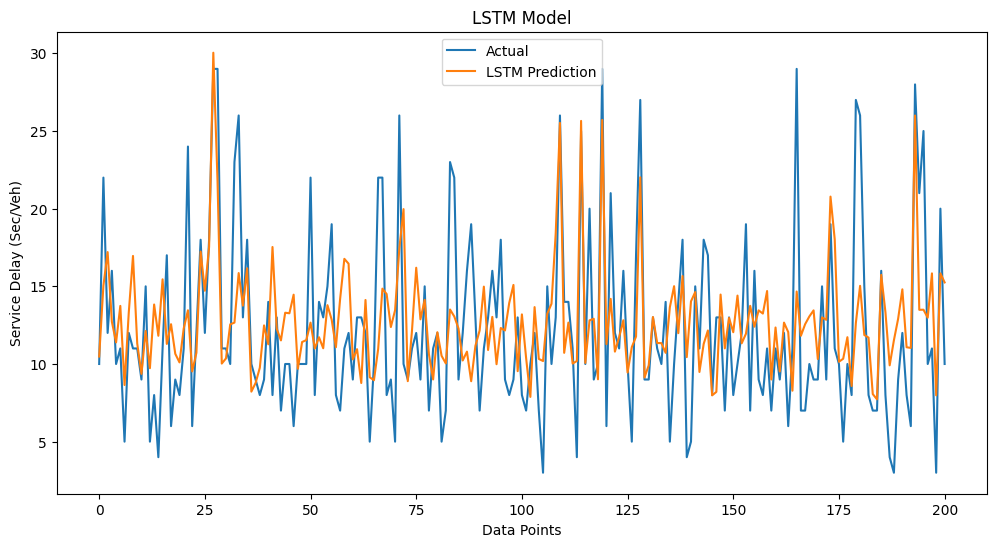

In [36]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [37]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/192
26/26 [==============================] - 4s 23ms/step - loss: 186.8340 - val_loss: 114.7937
Epoch 2/192
26/26 [==============================] - 0s 6ms/step - loss: 44.1189 - val_loss: 23.8203
Epoch 3/192
26/26 [==============================] - 0s 7ms/step - loss: 32.0197 - val_loss: 25.4140
Epoch 4/192
26/26 [==============================] - 0s 7ms/step - loss: 25.3518 - val_loss: 24.3799
Epoch 5/192
26/26 [==============================] - 0s 6ms/step - loss: 23.7638 - val_loss: 24.1116
Epoch 6/192
26/26 [==============================] - 0s 7ms/step - loss: 24.4152 - val_loss: 24.5174
Epoch 7/192
26/26 [==============================] - 0s 8ms/step - loss: 24.1074 - val_loss: 24.3824
Epoch 8/192
26/26 [==============================] - 0s 8ms/step - loss: 23.6080 - val_loss: 27.1545
Epoch 9/192
26/26 [==============================] - 0s 10ms/step - loss: 23.8882 - val_loss: 24.9184
Epoch 10/192
26/26 [==============================] - 0s 7ms/step - loss: 23.9978 - val

Visualize BiLSTM results

0.30631311034777753


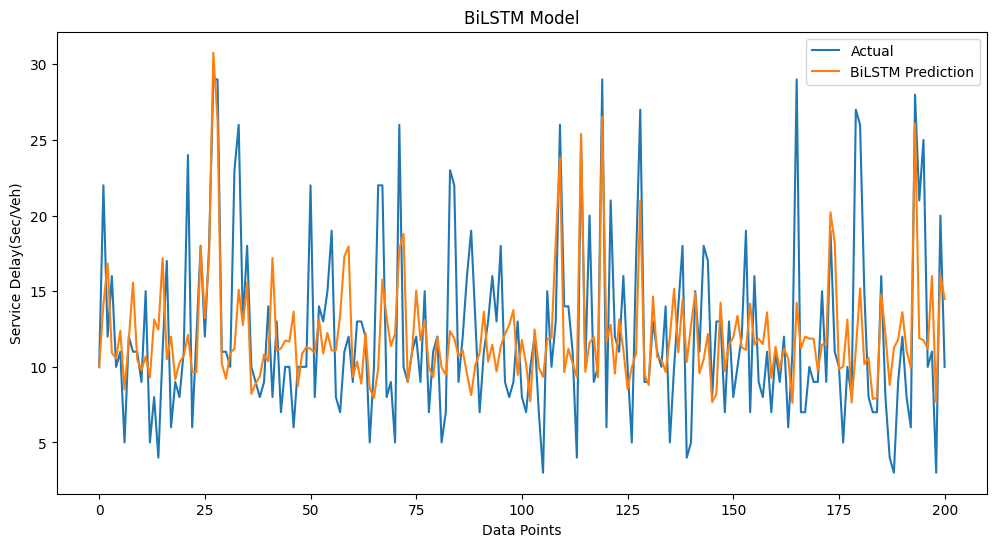

In [38]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [39]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/192
26/26 [==============================] - 3s 22ms/step - loss: 189.4684 - val_loss: 142.3506
Epoch 2/192
26/26 [==============================] - 0s 8ms/step - loss: 68.7290 - val_loss: 37.3745
Epoch 3/192
26/26 [==============================] - 0s 6ms/step - loss: 31.3797 - val_loss: 26.0607
Epoch 4/192
26/26 [==============================] - 0s 7ms/step - loss: 28.4557 - val_loss: 28.0403
Epoch 5/192
26/26 [==============================] - 0s 6ms/step - loss: 29.0918 - val_loss: 26.9305
Epoch 6/192
26/26 [==============================] - 0s 6ms/step - loss: 27.4460 - val_loss: 25.3566
Epoch 7/192
26/26 [==============================] - 0s 6ms/step - loss: 30.0262 - val_loss: 25.8319
Epoch 8/192
26/26 [==============================] - 0s 6ms/step - loss: 27.7676 - val_loss: 24.7222
Epoch 9/192
26/26 [==============================] - 0s 6ms/step - loss: 26.8670 - val_loss: 24.6740
Epoch 10/192
26/26 [==============================] - 0s 7ms/step - loss: 27.1842 - val_

Visualize GRU results

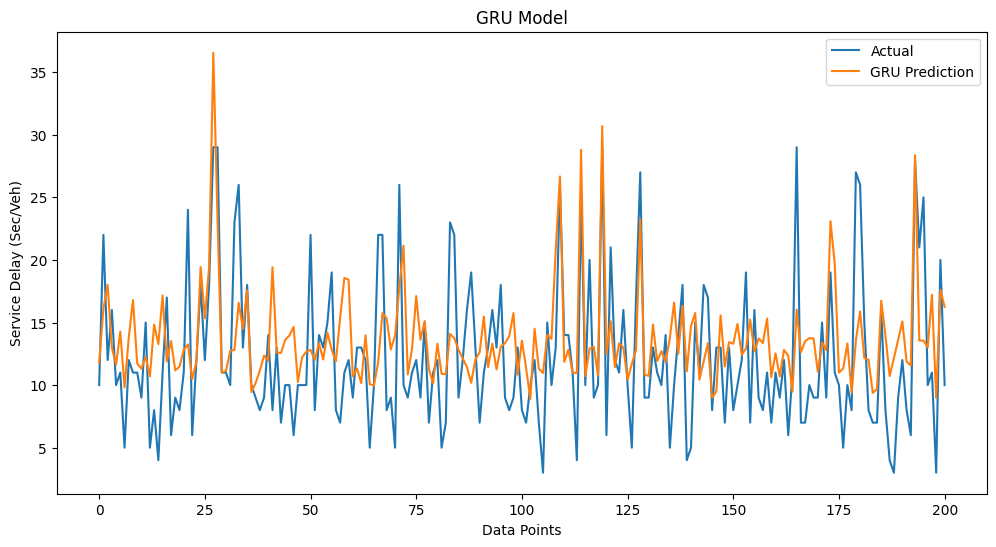

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [41]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/192
26/26 [==============================] - 7s 32ms/step - loss: 179.9130 - val_loss: 105.5767
Epoch 2/192
26/26 [==============================] - 0s 9ms/step - loss: 45.7038 - val_loss: 27.6616
Epoch 3/192
26/26 [==============================] - 0s 10ms/step - loss: 27.9281 - val_loss: 26.4718
Epoch 4/192
26/26 [==============================] - 0s 12ms/step - loss: 27.1052 - val_loss: 25.7031
Epoch 5/192
26/26 [==============================] - 0s 10ms/step - loss: 25.4265 - val_loss: 26.0606
Epoch 6/192
26/26 [==============================] - 0s 9ms/step - loss: 25.4661 - val_loss: 28.3954
Epoch 7/192
26/26 [==============================] - 0s 8ms/step - loss: 26.3012 - val_loss: 23.8403
Epoch 8/192
26/26 [==============================] - 0s 8ms/step - loss: 24.5561 - val_loss: 23.9991
Epoch 9/192
26/26 [==============================] - 0s 10ms/step - loss: 24.1963 - val_loss: 24.2788
Epoch 10/192
26/26 [==============================] - 0s 9ms/step - loss: 23.5932 - 

Visualize BiGRU results

0.318318455321011


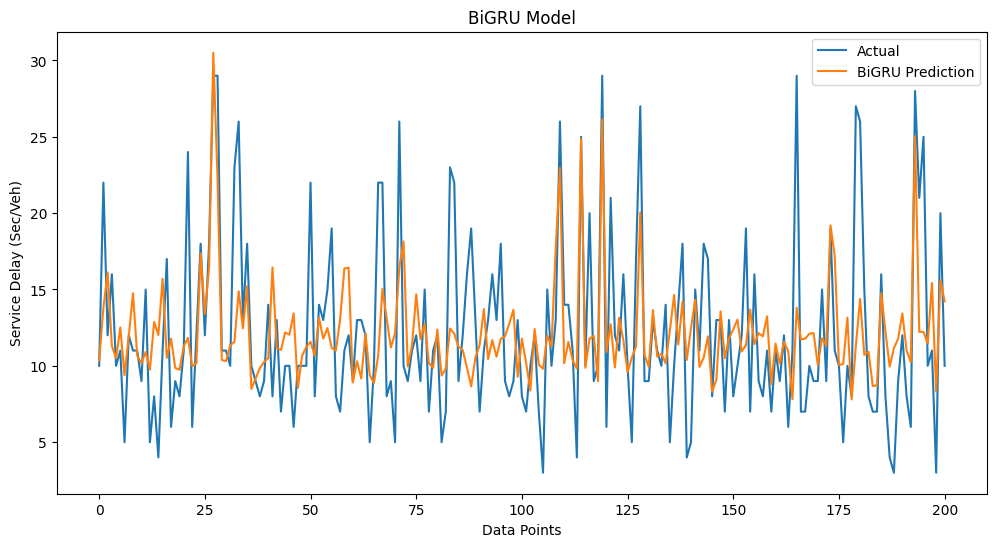

In [42]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [43]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=300, batch_size=64, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/300
13/13 [==============================] - 1s 16ms/step - loss: 189.2883 - val_loss: 158.4898
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 154.7794 - val_loss: 114.8982
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 99.2710 - val_loss: 56.5718
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 43.8299 - val_loss: 27.5208
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 30.5601 - val_loss: 31.0536
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 28.9425 - val_loss: 27.0220
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 28.3346 - val_loss: 26.7424
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 28.0458 - val_loss: 26.7044
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 27.4888 - val_loss: 26.2376
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 27.2064 - va

Visualize CNN results

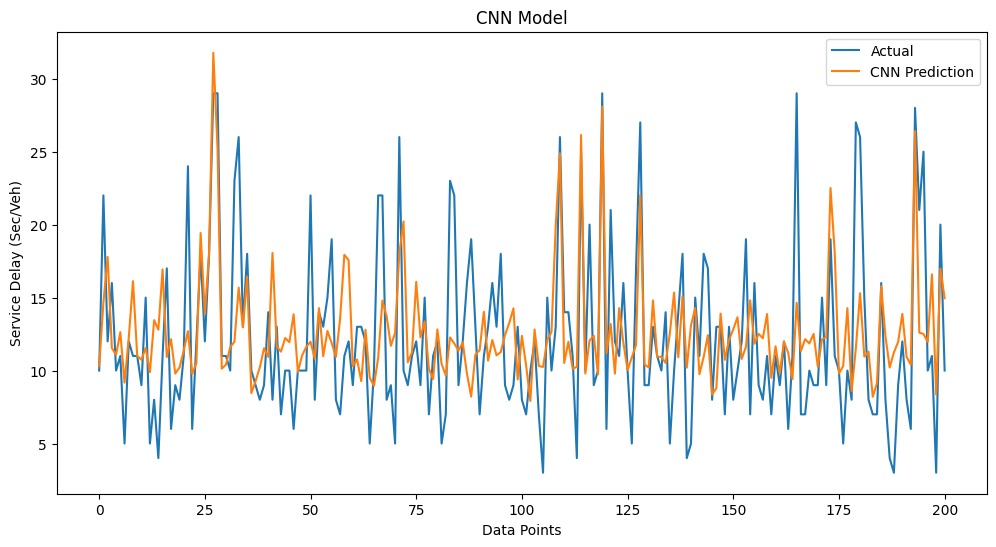

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [45]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/300
26/26 [==============================] - 1s 11ms/step - loss: 189.8386 - val_loss: 153.2200
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 88.2273 - val_loss: 25.2674
Epoch 3/300
26/26 [==============================] - 0s 4ms/step - loss: 30.7176 - val_loss: 25.0490
Epoch 4/300
26/26 [==============================] - 0s 4ms/step - loss: 27.1761 - val_loss: 25.0121
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 26.6517 - val_loss: 24.5894
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 26.3882 - val_loss: 24.5063
Epoch 7/300
26/26 [==============================] - 0s 4ms/step - loss: 26.8171 - val_loss: 24.3762
Epoch 8/300
26/26 [==============================] - 0s 4ms/step - loss: 26.7592 - val_loss: 25.5988
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 26.5279 - val_loss: 24.2491
Epoch 10/300
26/26 [==============================] - 0s 5ms/step - loss: 26.2719 - val_

Visualize CNN_LSTM results

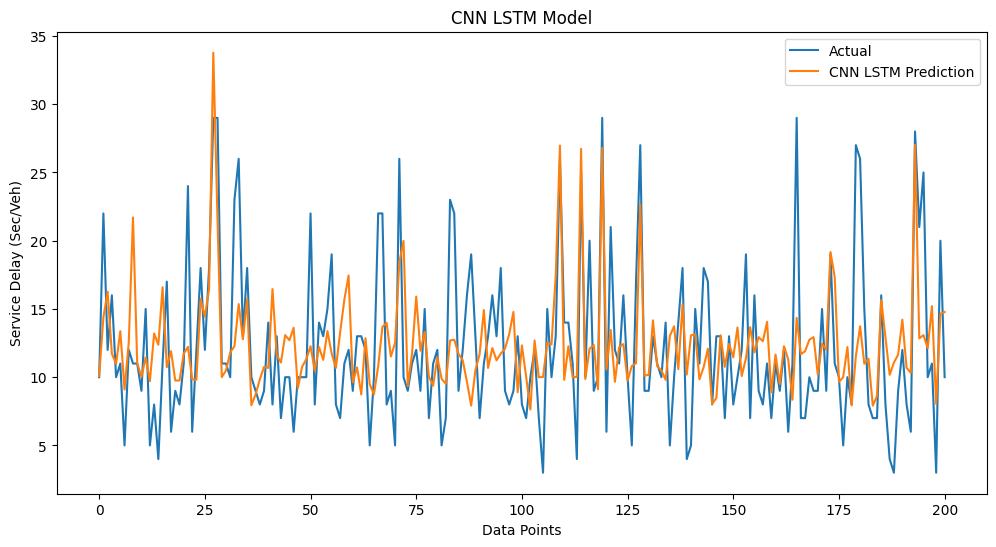

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [47]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/300
26/26 [==============================] - 3s 16ms/step - loss: 188.1168 - val_loss: 144.4576
Epoch 2/300
26/26 [==============================] - 0s 5ms/step - loss: 73.5059 - val_loss: 25.8346
Epoch 3/300
26/26 [==============================] - 0s 5ms/step - loss: 26.0614 - val_loss: 23.5891
Epoch 4/300
26/26 [==============================] - 0s 5ms/step - loss: 26.3355 - val_loss: 23.4161
Epoch 5/300
26/26 [==============================] - 0s 5ms/step - loss: 25.0187 - val_loss: 23.5913
Epoch 6/300
26/26 [==============================] - 0s 6ms/step - loss: 25.3582 - val_loss: 23.6016
Epoch 7/300
26/26 [==============================] - 0s 6ms/step - loss: 24.7162 - val_loss: 23.4826
Epoch 8/300
26/26 [==============================] - 0s 4ms/step - loss: 24.5636 - val_loss: 23.2945
Epoch 9/300
26/26 [==============================] - 0s 4ms/step - loss: 24.3519 - val_loss: 23.5809
Epoch 10/300
26/26 [==============================] - 0s 5ms/step - loss: 25.0856 - val_

Visualize CNN_BiLSTM results

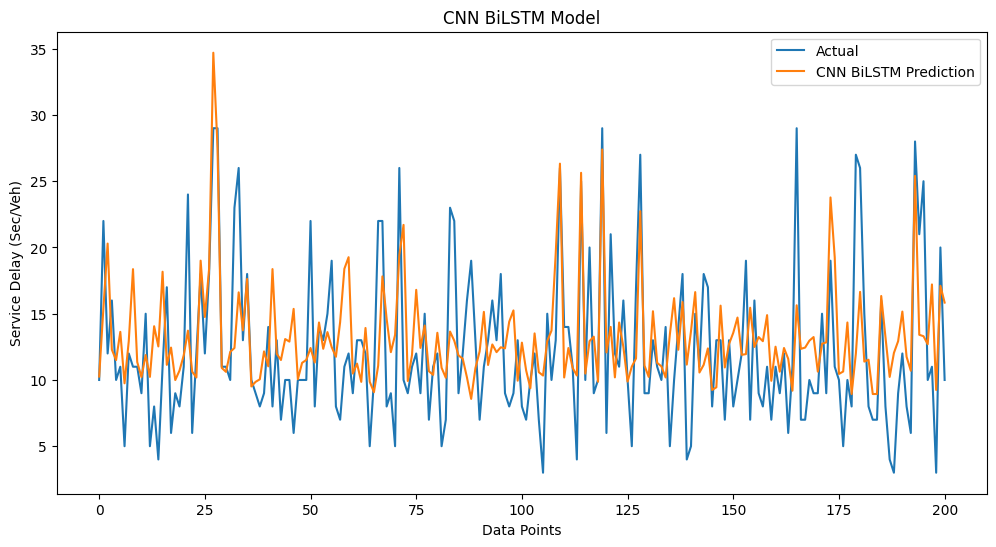

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [49]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

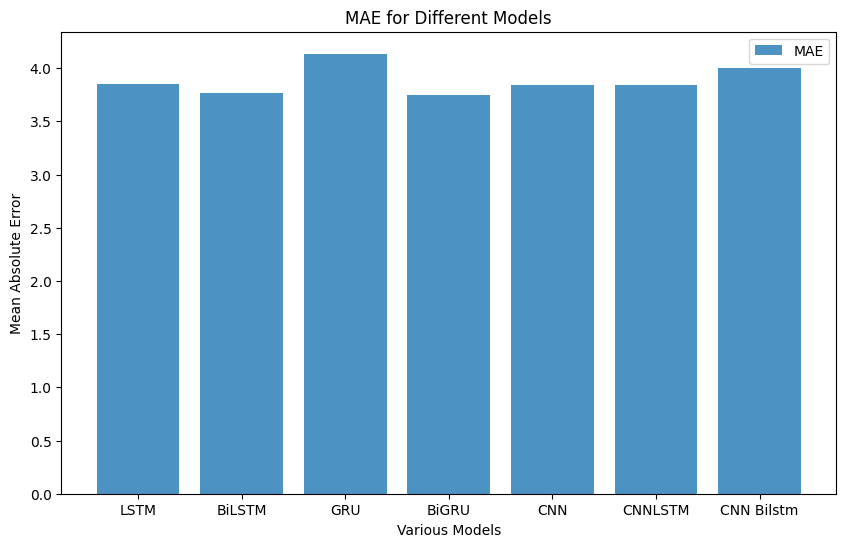

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

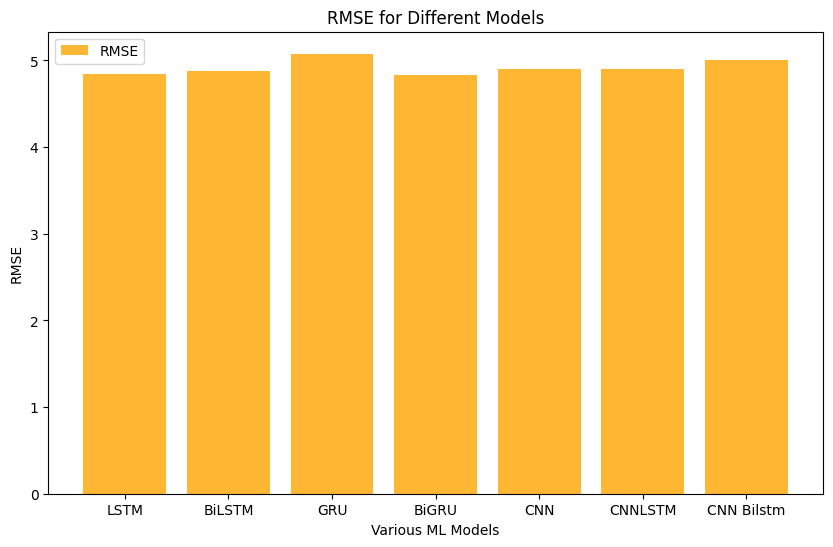

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

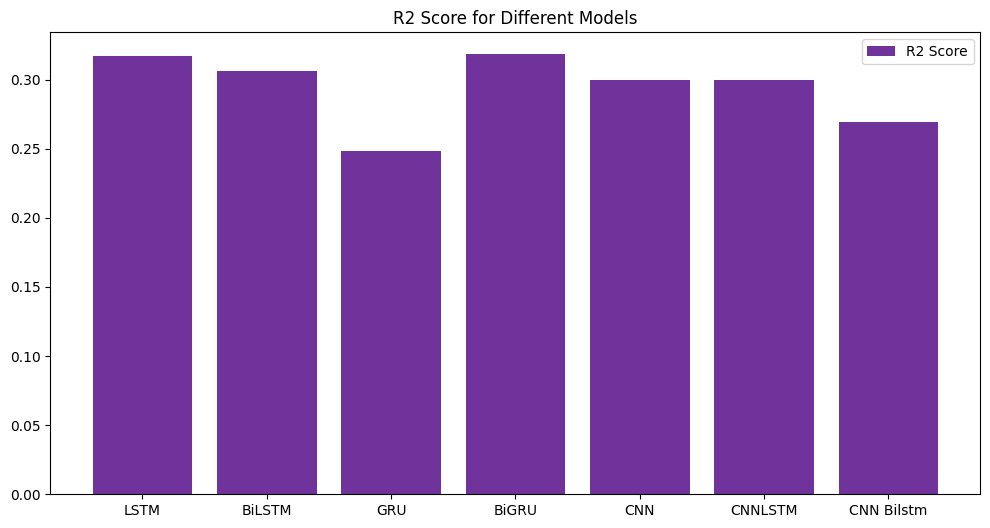

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [53]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.852842062859986
LSTM MSE: 4.839751803629678
LSTM R2 Score: 0.31691653827560073

BiLSTM MAE: 3.7701376468981085
BiLSTM MSE: 4.8771706129213275
BiLSTM R2 Score: 0.30631311034777753

GRU MAE: 4.1359846912213225
GRU MSE: 5.0774959876955545
GRU R2 Score: 0.24815768008590589

BiGRU MAE: 3.744567187864389
BiGRU MSE: 4.83478285346009
BiGRU R2 Score: 0.318318455321011

CNN MAE: 3.8451287354995953
CNN MSE: 4.8999092514707145
CNN R2 Score: 0.2998297343188271

CNN LSTM MAE: 3.8419480893149305
CNN LSTM MSE: 4.900396533253377
CNN LSTM R2 Score: 0.29969046758452245

CNN BiLSTM MAE: 4.000732867871944
CNN BiLSTM MSE: 5.004857876050025
CNN BiLSTM R2 Score: 0.2695153598943947


Plot predictions for each model

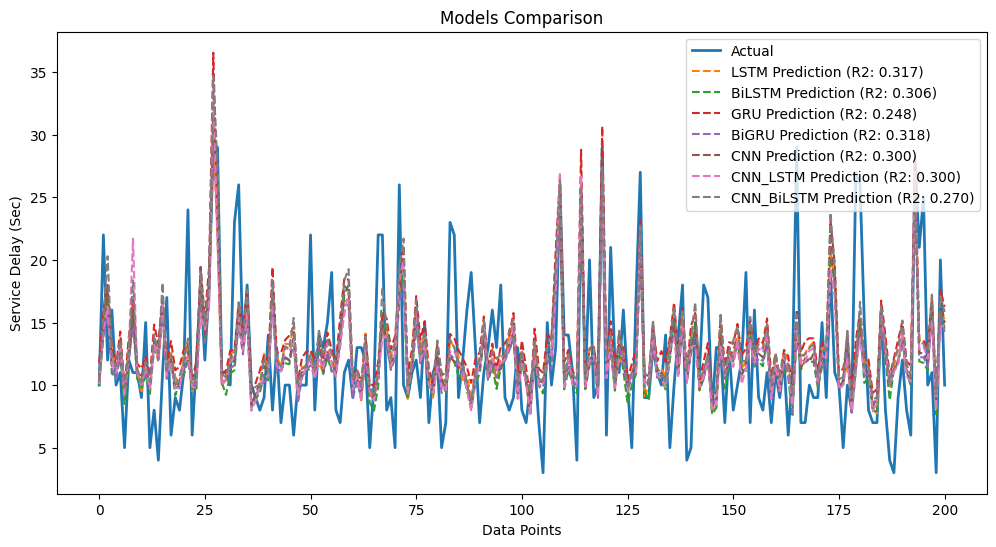

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Models Comparison')
plt.show()

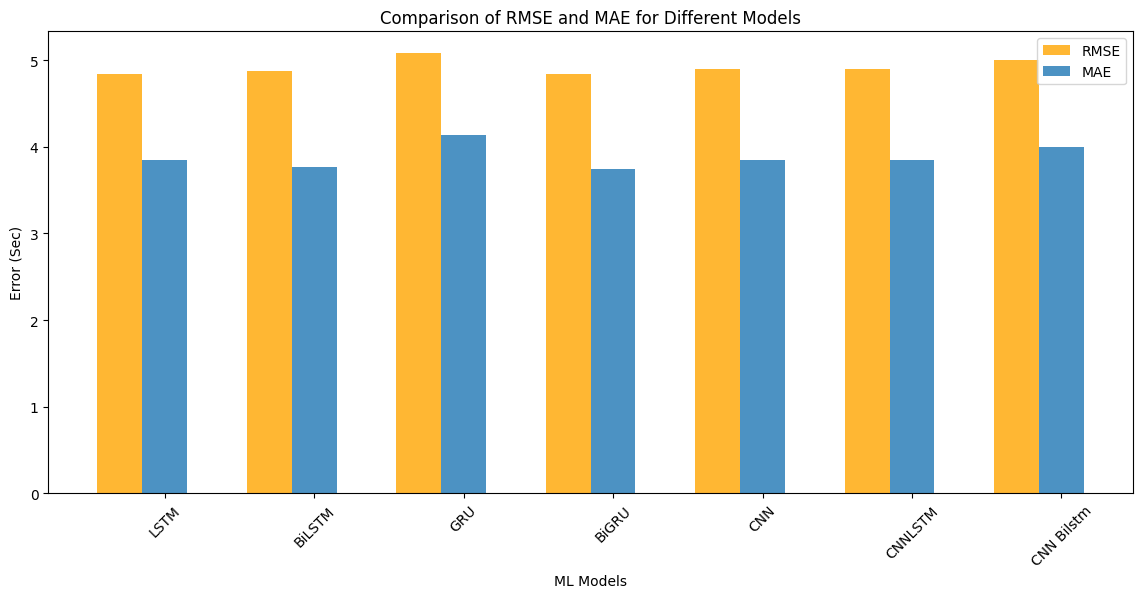

In [55]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE for Different Models')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()